In [2]:
import os
import numpy as np
import shutil

from glob import glob
import os
import matplotlib.pyplot as plt
import albumentations as A
from PIL import Image
from pathlib import Path

from tqdm import tqdm

import cv2

In [ ]:
path = '/Users/examsherpa/Library/CloudStorage/GoogleDrive-datascisteven@gmail.com/My\ Drive/Datasets/Omdena\ Myanmar/tuberculosis-detection-model'
root_dir = 

In [ ]:
# q
root_dir = 'original'
output_dir = 'data/sample/output'

# Create directories for training, validation sets.
for folder in ['train', 'val']:
    for cls in ['Non-Tuberculosis', 'Tuberculosis']:
        os.makedirs(os.path.join(output_dir, folder, cls))

# Creating partitions of the data after shuffling.
current_cls = 'Non-Tuberculosis'
src = os.path.join(root_dir, current_cls)
all_file_names_0 = os.listdir(src)
np.random.shuffle(all_file_names_0)
train_file_names_0, val_file_names_0 = np.split(np.array(all_file_names_0), [int(len(all_file_names_0) * 0.8)])
train_file_names_0 = [os.path.join(src, name) for name in train_file_names_0.tolist()]
val_file_names_0 = [os.path.join(src, name) for name in val_file_names_0.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

# Move to the next class
current_cls = 'Tuberculosis'
src = os.path.join(root_dir, current_cls)  # Folder to copy images from.
all_file_names_1 = os.listdir(src)
np.random.shuffle(all_file_names_1)
train_file_names_1, val_file_names_1 = np.split(np.array(all_file_names_1), [int(len(all_file_names_1) * 0.8)])
train_file_names_1 = [os.path.join(src, name) for name in train_file_names_1.tolist()]
val_file_names_1 = [os.path.join(src, name) for name in val_file_names_1.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

all_file_names = all_file_names_0 + all_file_names_1
train_file_names = train_file_names_0 + train_file_names_1
val_file_names = val_file_names_0 + val_file_names_1

print('Total images: ', len(all_file_names))
print('Training: ', len(train_file_names))
print('Validation: ', len(val_file_names))

100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

Total images:  170
Training:  135
Validation:  35


In [1]:
# q
root_dir = '/Volumes/My Backup Barracuda/Datasets/Tuberculosis/Augmented'
output_dir = '/Volumes/My Backup Barracuda/Datasets/Tuberculosis/Augmented/output'

# Create directories for training, validation sets.
for folder in ['train', 'val']:
    for cls in ['0', '1']:
        os.makedirs(os.path.join(output_dir, folder, cls))

# Creating partitions of the data after shuffling.
current_cls = 'Non-Tuberculosis'
src = os.path.join(root_dir, current_cls)
all_file_names_0 = os.listdir(src)
np.random.shuffle(all_file_names_0)
train_file_names_0, val_file_names_0 = np.split(np.array(all_file_names_0), [int(len(all_file_names_0) * 0.8)])
train_file_names_0 = [os.path.join(src, name) for name in train_file_names_0.tolist()]
val_file_names_0 = [os.path.join(src, name) for name in val_file_names_0.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

# Move to the next class
current_cls = 'Tuberculosis'
src = os.path.join(root_dir, current_cls)  # Folder to copy images from.
all_file_names_1 = os.listdir(src)
np.random.shuffle(all_file_names_1)
train_file_names_1, val_file_names_1 = np.split(np.array(all_file_names_1), [int(len(all_file_names_1) * 0.8)])
train_file_names_1 = [os.path.join(src, name) for name in train_file_names_1.tolist()]
val_file_names_1 = [os.path.join(src, name) for name in val_file_names_1.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

all_file_names = all_file_names_0 + all_file_names_1
train_file_names = train_file_names_0 + train_file_names_1
val_file_names = val_file_names_0 + val_file_names_1

print('Total images: ', len(all_file_names))
print('Training: ', len(train_file_names))
print('Validation: ', len(val_file_names))

NameError: name 'os' is not defined

In [22]:
# defining augmentation pipeline
transform = A.Compose([
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightness(limit=0.3, p=0.5),
    A.RandomContrast(limit=0.3, p=0.5),
    A.CLAHE(clip_limit=4.0, p=0.3),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.3),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, border_mode=0, p=0.4),
    A.Resize(256, 256)
])

full_paths = glob('data/sample/Tuberculosis/*.png')
filenames = os.listdir('data/sample/Tuberculosis')

In [15]:
def visualize(image):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image)

image = cv2.imread(full_paths[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = np.array(Image.open(full_paths[i]))
transformed = transform(image=image)
aug_img = transformed['image']
aug_img = cv2.resize(aug_img, (255, 255))
visualize(aug_img)

In [ ]:
root_dir = 'data/tuberculosis/Augmented'
output_dir = 'data/tuberculosis/output'

# Create directories for training, validation sets.
for folder in ['train', 'val']:
    for cls in ['0', '1']:
        os.makedirs(os.path.join(output_dir, folder, cls))

# Creating partitions of the data after shuffling.
current_cls = '0'
src = os.path.join(root_dir, current_cls)
all_file_names_0 = os.listdir(src)
np.random.shuffle(all_file_names_0)
train_file_names_0, val_file_names_0 = np.split(np.array(all_file_names_0), [int(len(all_file_names_0) * 0.8)])
train_file_names_0 = [os.path.join(src, name) for name in train_file_names_0.tolist()]
val_file_names_0 = [os.path.join(src, name) for name in val_file_names_0.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

# Move to the next class
current_cls = '1'
src = os.path.join(root_dir, current_cls)  # Folder to copy images from.
all_file_names_1 = os.listdir(src)
np.random.shuffle(all_file_names_1)
train_file_names_1, val_file_names_1 = np.split(np.array(all_file_names_1), [int(len(all_file_names_1) * 0.8)])
train_file_names_1 = [os.path.join(src, name) for name in train_file_names_1.tolist()]
val_file_names_1 = [os.path.join(src, name) for name in val_file_names_1.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

all_file_names = all_file_names_0 + all_file_names_1
train_file_names = train_file_names_0 + train_file_names_1
val_file_names = val_file_names_0 + val_file_names_1

print('Total images: ', len(all_file_names))
print('Training: ', len(train_file_names))
print('Validation: ', len(val_file_names))

/var/folders/_1/5_00v86n0lvgk2xlkx9tzzcc0000gn/T/ipykernel_28520/2248308887.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


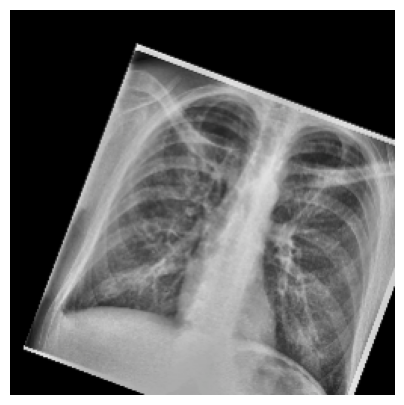

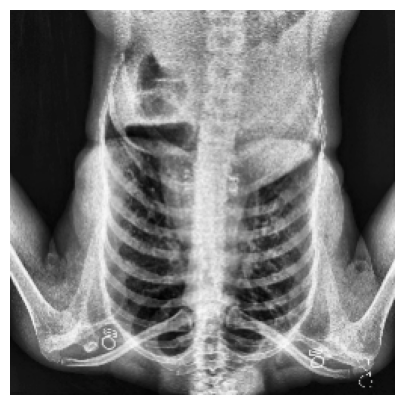

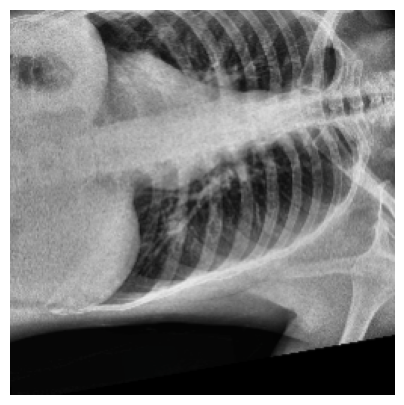

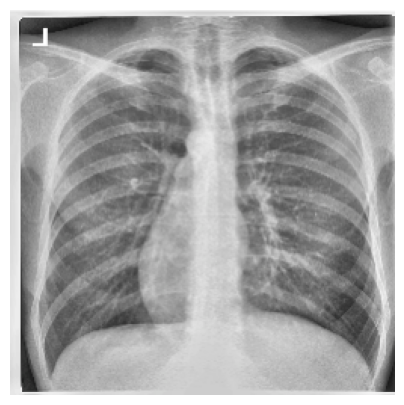

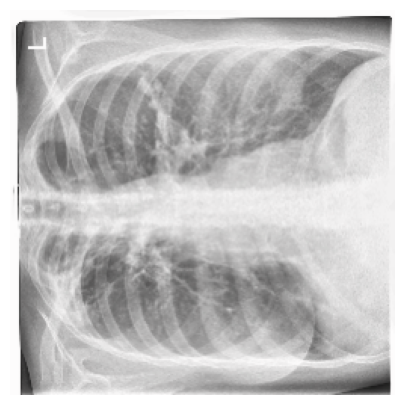

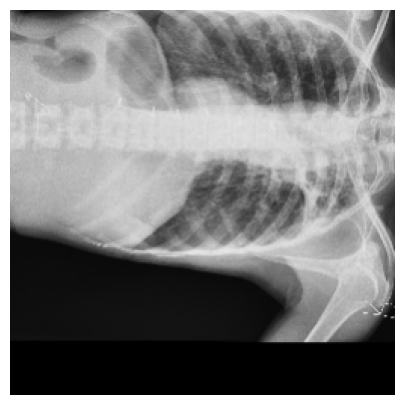

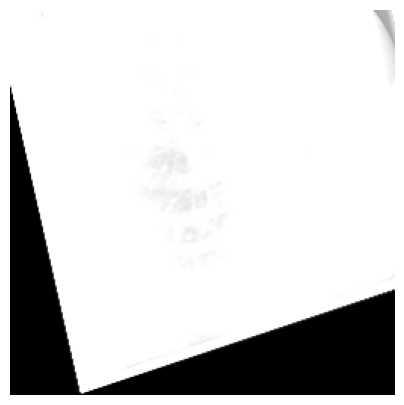

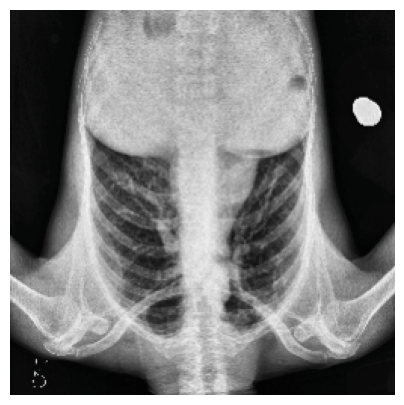

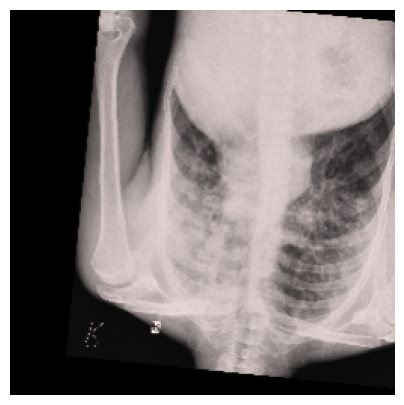

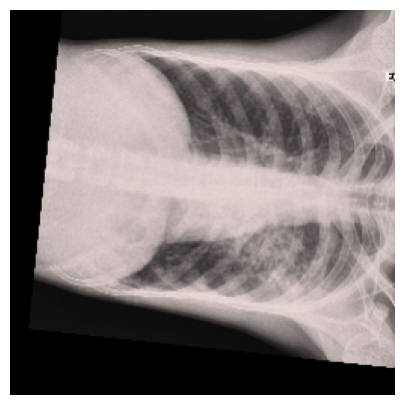

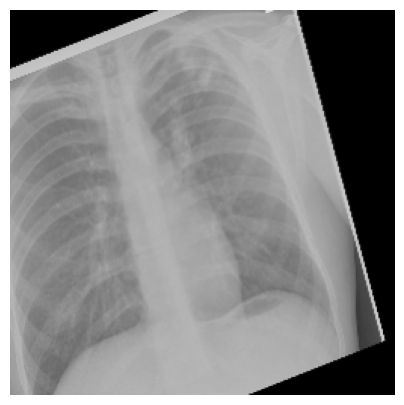

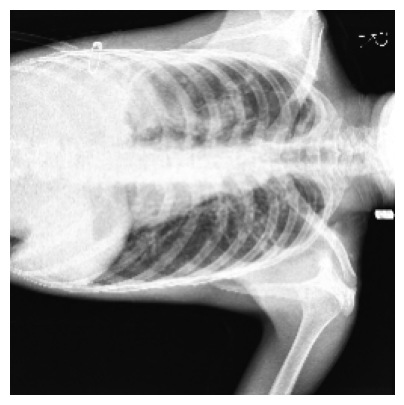

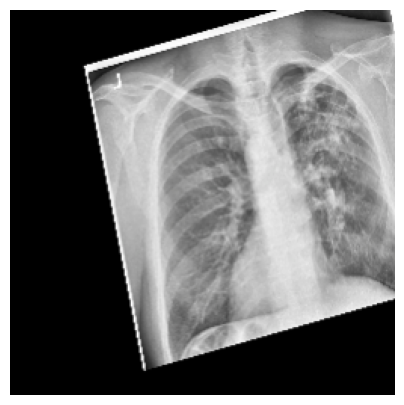

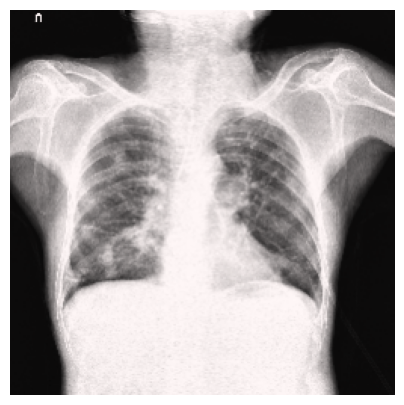

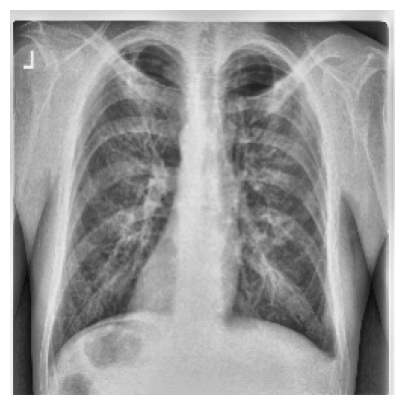

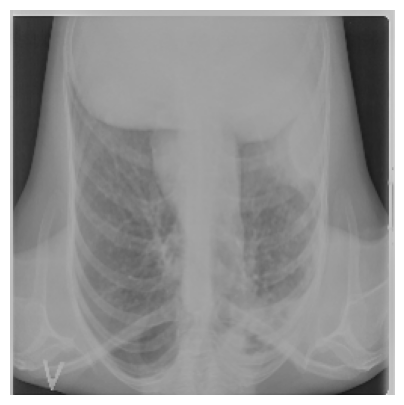

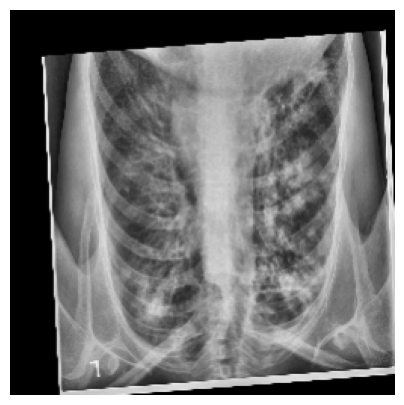

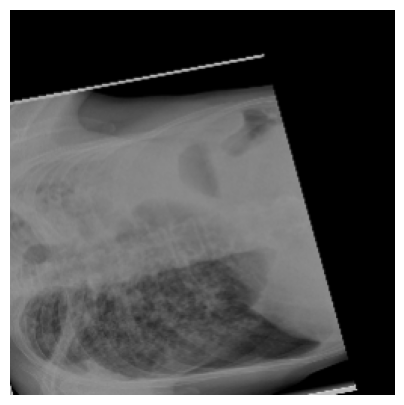

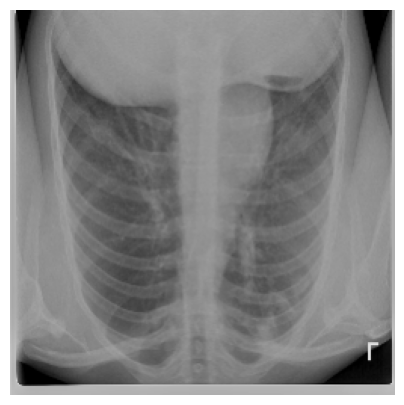

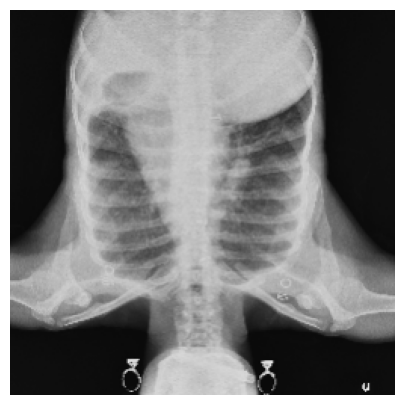

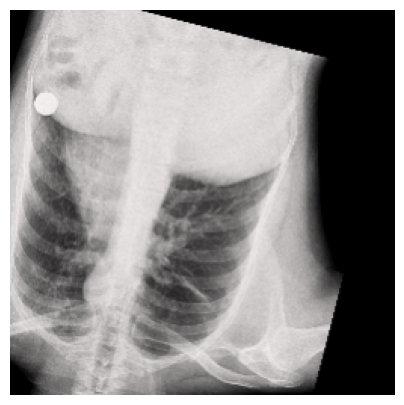

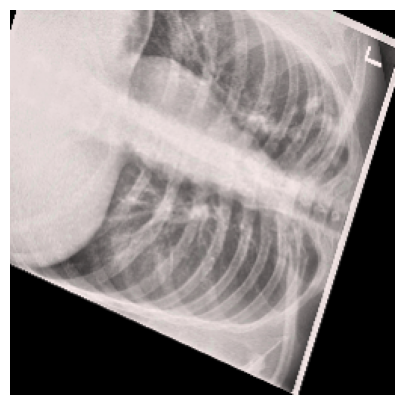

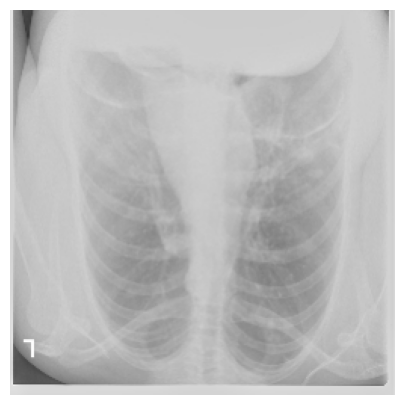

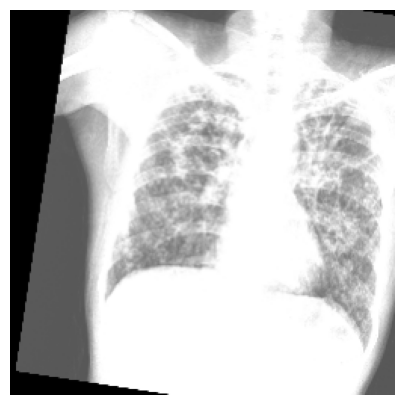

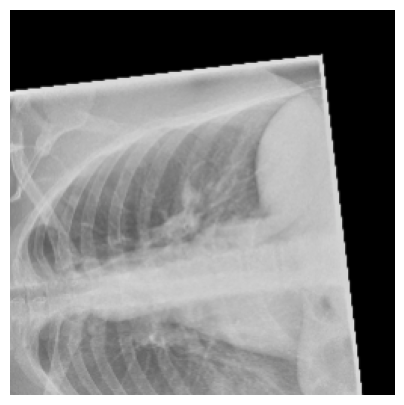

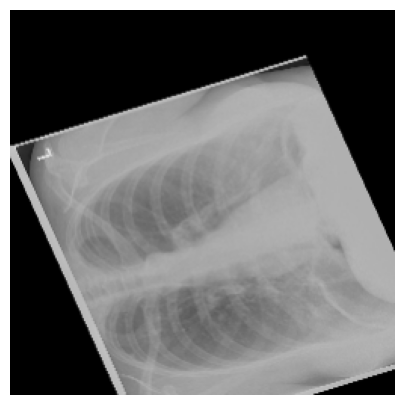

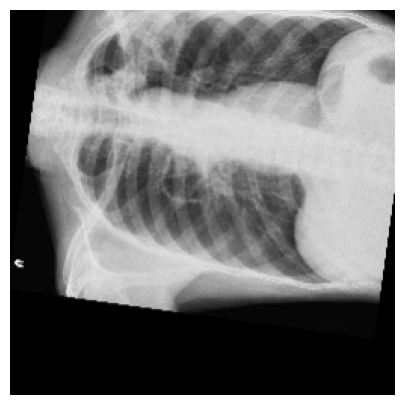

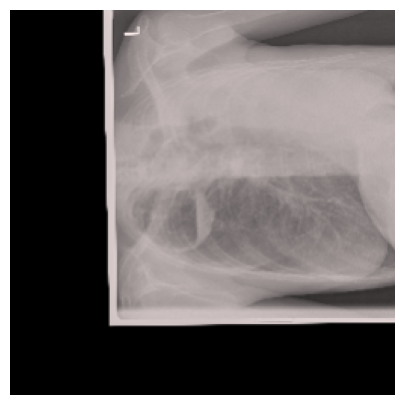

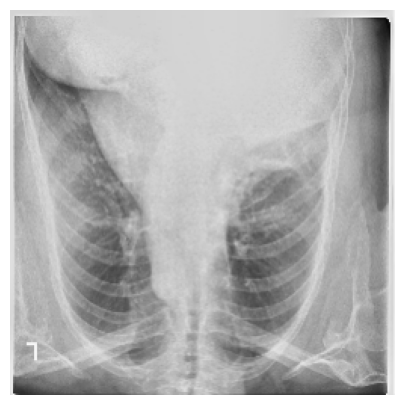

In [24]:
for i in range(0, len(full_paths)):   
    image = cv2.imread(full_paths[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transformed = transform(image=image)
    aug_img = transformed['image']
    aug_img = cv2.resize(aug_img, (255, 255))
    cv2.imwrite((os.path.join(root_dir, f"aug_{filenames[i]}")), aug_img)

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')